In [0]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

# Анализ на разпределението на слънчевата енергия за гр.София за периода април 1996 до март 2004.

### Автор: Росен Аначков

### 1.Въведение:

Целта е да се анализира разпределението и количеството на слънчевата енергия на територията на град София, който анализ да се използва при практическото изграждане на фотоволтаични системи за захранване на различни обекти.

### 2.Хипотези:

2.1.Възможно ли е целогодишното използване на слънчевата енергия за град София.

    2.1.1.Изследване индексът на сезонност.
    2.1.2.Определяне честотата и продължителността на периодите без слънце.
2.2.Равномерно ли е разпределена слънчевата енергия в различните сезони и месеци.



### 3.Събиране на данни:

Данните за слънчевата радиация са измерени от едночипов микропроцесорен записващ уред с 8 битов процесор 68НС11 на фирмата Моторола. За преобразуване на сигнала се използва вграденият аналогово-цифров преобразувател на процесора. Измервателния уред е с 32 кВ RAM в която могат да бъдат записани данните от измерванията за около два месеца. За датчик се използва фотоволтаична батерия насочена на юг и наклонена на 60 спрямо хоризонта с Рн=280 mW и Uн=2 V, към която е свързан постоянен товар с R=10 .
    Разпределение на измерените мощности по големина и време
Номиналната мощност на батерията се разделя на 10 равни интервала и във всеки интервал се натрупва броя на измерените стойности на мощността, които са в границите на интервала.
     Описание на метода за получаване на абсолютната стойност на слънчевата радиация.Понеже датчика е свързан към постоянен товар измерената мощност е почти винаги по-малка от мощността която батерията може да генерира при същите условия, но при оптимален товар. Поради тази причина се използва таблица на съответствие между генерираните мощности при товар 10 ома и същите ако батерията е натоварена с оптимален товар. Сравнителната таблица е направена за 16 различни температури в интервала от -9 С до +30 С, за да се намали грешката от температурната зависимост на датчика.


In [50]:
df = pd.read_excel('raspred_day_energy_naklon_96_2004_5.xlsx', sheetname='Sheet1',header=None)

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [0]:
df.columns = ['Date','average_power [mW]','max_power [mW]','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%','total energy from battery [mW]']

### 4.Почистване на данни:

In [52]:
df.head(5)

Date  ...  total energy from battery [mW]
0  1996-04-01 00:00:00  ...                        1772.940
1  1996-04-02 00:00:00  ...                         995.735
2  1996-04-03 00:00:00  ...                         262.992
3  1996-04-04 00:00:00  ...                         498.030
4  1996-04-05 00:00:00  ...                          62.798

[5 rows x 14 columns]

In [53]:
df.tail(10)

Date  ...  total energy from battery [mW]
3106  2004-03-26 00:00:00  ...                          38.332
3107  2004-03-27 00:00:00  ...                          45.372
3108  2004-03-28 00:00:00  ...                        1384.508
3109  2004-03-29 00:00:00  ...                        1652.242
3110  2004-03-30 00:00:00  ...                        1678.072
3111  2004-03-31 00:00:00  ...                        1678.344
3112                  NaN  ...                             NaN
3113                  NaN  ...                             NaN
3114                  NaN  ...                             NaN
3115                  NaN  ...                             NaN

[10 rows x 14 columns]

Почистваме данните от последните редове.

In [54]:
df = df.drop(df.tail(4).index)
df.tail(5)

Date  ...  total energy from battery [mW]
3107  2004-03-27 00:00:00  ...                          45.372
3108  2004-03-28 00:00:00  ...                        1384.508
3109  2004-03-29 00:00:00  ...                        1652.242
3110  2004-03-30 00:00:00  ...                        1678.072
3111  2004-03-31 00:00:00  ...                        1678.344

[5 rows x 14 columns]

In [55]:
df.dtypes

Date                               object
average_power [mW]                float64
max_power [mW]                    float64
10%                               float64
20%                               float64
30%                               float64
40%                               float64
50%                               float64
60%                               float64
70%                               float64
80%                               float64
90%                               float64
100%                              float64
total energy from battery [mW]    float64
dtype: object

Виждаме,че датата е обект. Правим опит да конвертиране към datetime, като получаваме грешка. Намираме грешната дата и я оправяме.

In [56]:
df.loc[df['Date'] == '28,04,99']

Date  average_power [mW]  ...   100%  total energy from battery [mW]
1194  28,04,99               317.7  ...  145.0                         755.702

[1 rows x 14 columns]

In [57]:
df['Date'][1194] = '04.28.99'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
df.loc[df['Date'] == '04.28.99']

Date  average_power [mW]  ...   100%  total energy from battery [mW]
1194  04.28.99               317.7  ...  145.0                         755.702

[1 rows x 14 columns]

In [59]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                              datetime64[ns]
average_power [mW]                       float64
max_power [mW]                           float64
10%                                      float64
20%                                      float64
30%                                      float64
40%                                      float64
50%                                      float64
60%                                      float64
70%                                      float64
80%                                      float64
90%                                      float64
100%                                     float64
total energy from battery [mW]           float64
dtype: object

Правим проверка за невалидни редове без дата.

In [60]:
df['Date'].isnull().values.any()

True

Премахваме невалидните дати

In [0]:
df = df[df.Date.notnull()] 

In [62]:
df['Date'].isnull().values.any()

False

In [63]:
print(df.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111],
           dtype='int64', length=2922)


Слагаме датата като index

In [0]:
df.set_index(df["Date"],inplace=True)

In [65]:
df

Date  average_power [mW]  ...  100%  total energy from battery [mW]
Date                                       ...                                      
1996-04-01 1996-04-01               940.6  ...   0.0                        1772.940
1996-04-02 1996-04-02               375.5  ...   0.0                         995.735
1996-04-03 1996-04-03                51.3  ...   0.0                         262.992
1996-04-04 1996-04-04               130.2  ...   0.0                         498.030
1996-04-05 1996-04-05                 8.4  ...   0.0                          62.798
1996-04-06 1996-04-06               384.4  ...   0.0                         998.885
1996-04-07 1996-04-07               733.9  ...   0.0                        1509.089
1996-04-08 1996-04-08               806.3  ...   0.0                        1629.010
1996-04-09 1996-04-09               390.2  ...   0.0                        1125.145
1996-04-10 1996-04-10               274.8  ...   0.0                         855.516
1996-04-11 1996-04-11               140.5  ...   0.0                         636.836
1996-04-12 1996-04-12               326.0  ...   0.0                         976.423
1996-04-13 1996-04-13               136.7  ...   0.0                         543.965
1996-04-14 1996-04-14                59.1  ...   0.0                         262.027
1996-04-15 1996-04-15               101.4  ...   0.0                         454.248
1996-04-16 1996-04-16               133.0  ...   0.0                         569.352
1996-04-17 1996-04-17               348.7  ...  16.0                         932.388
1996-04-18 1996-04-18               248.6  ...   0.0                         830.028
1996-04-19 1996-04-19               288.2  ...   0.0                         831.568
1996-04-20 1996-04-20                74.6  ...   0.0                         420.766
1996-04-21 1996-04-21               336.4  ...   0.0                        1062.666
1996-04-22 1996-04-22              1012.3  ...   0.0                        1914.114
1996-04-23 1996-04-23               913.0  ...   0.0                        1789.550
1996-04-24 1996-04-24               837.2  ...   0.0                        1686.518
1996-04-25 1996-04-25               594.4  ...   0.0                        1374.222
1996-04-26 1996-04-26               552.8  ...   0.0                        1324.232
1996-04-27 1996-04-27               444.3  ...   0.0                        1117.007
1996-04-28 1996-04-28               197.6  ...   0.0                         643.588
1996-04-29 1996-04-29               647.5  ...   0.0                        1404.150
1996-04-30 1996-04-30               232.2  ...   0.0                         742.314
...               ...                 ...  ...   ...                             ...
2004-03-02 2004-03-02                19.5  ...   0.0                         154.067
2004-03-03 2004-03-03               520.7  ...   2.0                        1074.054
2004-03-04 2004-03-04               841.4  ...   2.0                        1567.711
2004-03-05 2004-03-05               652.8  ...   0.0                        1331.107
2004-03-06 2004-03-06               646.8  ...   5.0                        1536.207
2004-03-07 2004-03-07               880.2  ...   0.0                        1727.906
2004-03-08 2004-03-08               239.0  ...   0.0                         661.557
2004-03-09 2004-03-09                 5.4  ...   0.0                          49.762
2004-03-10 2004-03-10                 9.8  ...   0.0                          73.364
2004-03-11 2004-03-11                35.3  ...   0.0                         239.647
2004-03-12 2004-03-12                 6.9  ...   0.0                          54.995
2004-03-13 2004-03-13                26.6  ...   0.0                         187.262
2004-03-14 2004-03-14               597.2  ...   0.0                        1276.779
2004-03-15 2004-03-15               321.4  ...   0.0                         926.819
2004-03-16 2004-03-16 

Колоните average и max power няма да ни бъдат нужни и затова ги премахваме

In [66]:

del df['average_power [mW]']
del df['max_power [mW]']
df.head()

Date       10%  ...  100%  total energy from battery [mW]
Date                             ...                                      
1996-04-01 1996-04-01  167976.0  ...   0.0                        1772.940
1996-04-02 1996-04-02  328279.0  ...   0.0                         995.735
1996-04-03 1996-04-03  206974.0  ...   0.0                         262.992
1996-04-04 1996-04-04  371950.0  ...   0.0                         498.030
1996-04-05 1996-04-05  134805.0  ...   0.0                          62.798

[5 rows x 12 columns]

### 5.Анализ на данни:

5.1.Групираме по месеци и години, за да видим разпределението на слънчевата енергия.

In [0]:
def plot_line(data, ylabel, xlabel, title):
    data.plot.line()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

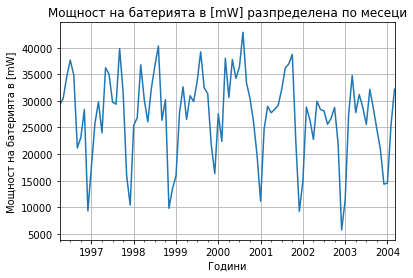

In [95]:
by_month = df.groupby(pd.Grouper(freq='M'))['total energy from battery [mW]'].sum()
plot_line(by_month, 'Мощност на батерията в [mW]', 'Години', 'Мощност на батерията в [mW] разпределена по месеци')


От данните за периода не може да се направи извод за наличие на тенденция към нарастване или намаляване по месеци за град София, като изклюяваме 2004 година, защото не е пълна.

In [0]:
def plot_barh(x_data,y_data, xlabel, title):
    x_pos = np.arange(len(x_data))
    plt.barh(x_pos, y_data, align='center', alpha=0.9)
    plt.yticks(x_pos, x_data)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

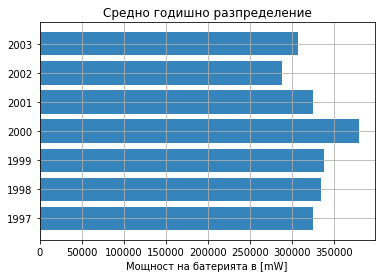

In [114]:
exclude_2004 = df[df['Date'].dt.year != 2004]
exclude_1996 = exclude_2004[exclude_2004['Date'].dt.year != 1996]
by_years = exclude_1996.groupby(exclude_1996['Date'].dt.year)['total energy from battery [mW]'].sum()
years = ('1997', '1998', '1999', '2000', '2001','2002','2003')

plot_barh(years, by_years,'Мощност на батерията в [mW]', 'Средно годишно разпределение' )



По години не се вижда, че има тенденция на нарастване или намаляване на слънчевата енергия, но периода е малък за да може да се направи пълен анализ.

### 5.2.Проверка за наличие на сезонност.

5.2.1.Групиране по месеци за периода от 1996 до 2004г.

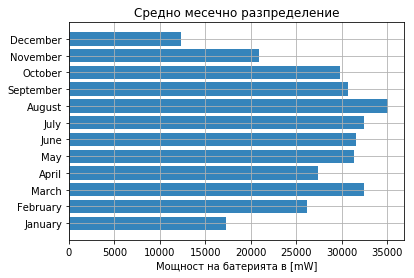

In [115]:
by_months = df.groupby(df['Date'].dt.month)['total energy from battery [mW]'].sum()
by_months = by_months/8
months = ('January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December')



plot_barh(months, by_months,'Мощност на батерията в [mW]', 'Средно месечно разпределение')



Вижда се, че има рязко намаляване на генерираната  енергия през зимните месеци и сравнително разномерно през останалите месеци, като ясно изразено нарастване през август и март.

5.2.2.Изчисляване коефициента на сезонност.

Изчисляваме средномесечната енергия генерирана от батерията.

In [0]:

mean_energy = by_months.mean()

In [71]:
by_months

Date
1     17303.834375
2     26140.144875
3     32434.250500
4     27356.202250
5     31372.416375
6     31532.530125
7     32468.757250
8     35056.255125
9     30664.676875
10    29853.089500
11    20887.488125
12    12335.370250
Name: total energy from battery [mW], dtype: float64

Изчисляваме коефициента на сезонност.

In [72]:
season_coef = []
for ele in by_months:
  season_coef.append(ele/mean_energy)
season_coef

[0.6342175672037706,
 0.9580847071056534,
 1.1887753315477334,
 1.0026554613811898,
 1.1498571449229007,
 1.1557256103046298,
 1.1900400678231058,
 1.2848766555910938,
 1.1239171818964102,
 1.0941710019809665,
 0.7655651121334287,
 0.4521141581091194]

5.2.3.Сравняване на получените стойности с побликуваните от проф.Стефка Лингова данни за месечното разпределение на слънчевата енергия за България при средни условия на облачност.

In [0]:
test_data = np.array([155,240,370,490,555,620,630,565,420,270,150,105]) 

In [0]:
mean_test_data = test_data.mean()

In [75]:
season_coef_test = []
for ele in test_data:
  season_coef_test.append(ele/mean_test_data)
season_coef_test

[0.40700218818380746,
 0.6301969365426696,
 0.9715536105032824,
 1.2866520787746172,
 1.4573304157549234,
 1.6280087527352298,
 1.6542669584245078,
 1.4835886214442013,
 1.1028446389496718,
 0.7089715536105033,
 0.3938730853391685,
 0.27571115973741794]

За онагледяване данните от двете изследвания са показани графично.

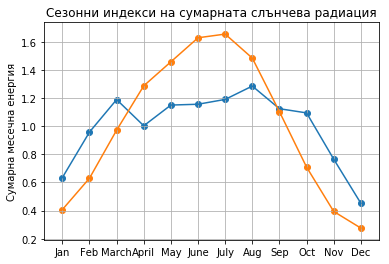

In [76]:
months = ('Jan', 'Feb', 'March', 'April', 'May', 'June','July','Aug','Sep','Oct','Nov','Dec')
plt.scatter(months,season_coef)
plt.plot(months,season_coef)
plt.scatter(months,season_coef_test)
plt.plot(months, season_coef_test)
plt.ylabel('Сумарна месечна енергия')
plt.title('Сезонни индекси на сумарната слънчева радиация')
plt.grid(True)
plt.show()


    Ясно се забелязват по-ниските стойности през летните месеци и по-високите през зимните месеци на изследваните данни, спрямо публикуваните от проф.Лингова.
Най-вероятно тези разлики се дължат основно на влианието на температурата на фотоволтаичната батерия(сензор) върху генерираната енергия.
    При масово произвежданите слънчеви батерии (каквато е и използваната за измерване) генерираната мощност е силно зависима от температурата на модула като през лятото генерираната мощност на модула може да бъде до 35% по-ниска спрямо стандартните тестови условия. Докато зимата може да се увеличи до 20% спрямо стандартните тестови условия.
    Този процес се вижда на показаната по-долу графика. 


In [0]:
test_temp_data = np.array([-1.8,0.3,5,10.5,15.4,18.7,21,20.6,16.5,11.2,5.3,0.4]) 

In [78]:
test_temp_data_mean = test_temp_data.mean()
test_temp_data_mean

10.258333333333335

In [79]:
month_temp_test = []
for ele in test_temp_data:
  month_temp_test.append(ele/test_temp_data_mean)
month_temp_test

[-0.17546709991876522,
 0.029244516653127533,
 0.4874086108854589,
 1.0235580828594637,
 1.5012185215272136,
 1.8229082047116163,
 2.0471161657189274,
 2.0081234768480907,
 1.6084484159220145,
 1.0917952883834279,
 0.5166531275385864,
 0.03899268887083671]

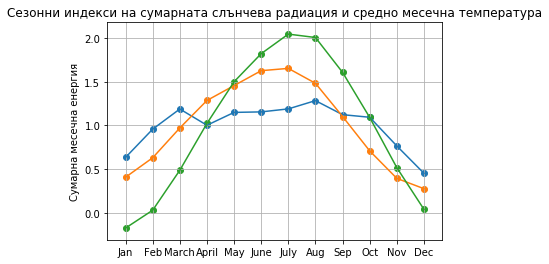

In [80]:
months = ('Jan', 'Feb', 'March', 'April', 'May', 'June','July','Aug','Sep','Oct','Nov','Dec')
plt.scatter(months,season_coef)
plt.plot(months,season_coef)
plt.scatter(months,season_coef_test)
plt.plot(months, season_coef_test)
plt.scatter(months,month_temp_test)
plt.plot(months, month_temp_test)
plt.ylabel('Сумарна месечна енергия')
plt.title('Сезонни индекси на сумарната слънчева радиация и средно месечна температура')
plt.grid(True)
plt.show()

### 5.3. Анализиране на данните по отношение продължителността и честотата на периодите без слънце.

    Една от важните характеристики по отношение продължителността на слънчевото греене са продължителността и честотата на периодите без слънце.
    Приемаме, че ден без слънце е всеки, при който генерираната от батерията мощност не превишава 10% от номиналната мощност. 
      За целта филтрираме данните и ги запазваме в нов DataFrame.

In [81]:
df_clouded = df.loc[(df['20%'] == 0) & (df['30%'] == 0) & (df['40%'] == 0) & (df['50%'] == 0) & (df['60%'] == 0) & (df['70%'] == 0) & (df['80%'] == 0) & (df['90%'] == 0) & (df['100%'] == 0)]
df_clouded.head()

Date       10%  20%  ...  90%  100%  total energy from battery [mW]
Date                                  ...                                           
1996-05-29 1996-05-29  137763.0  0.0  ...  0.0   0.0                          50.542
1996-09-19 1996-09-19     583.0  0.0  ...  0.0   0.0                           0.149
1996-09-27 1996-09-27    1465.0  0.0  ...  0.0   0.0                           0.376
1996-10-06 1996-10-06  180979.0  0.0  ...  0.0   0.0                          76.442
1996-10-08 1996-10-08  132176.0  0.0  ...  0.0   0.0                          51.782

[5 rows x 12 columns]

За да намерим продължителността на периодите без слънце маркираме поредността на дните с булеви стойности.

In [82]:
dt = df_clouded['Date']
day = pd.Timedelta('1d')
in_block = ((dt - dt.shift(-1)).abs() == day) | (dt.diff() == day)
in_block



Date
1996-05-29    False
1996-09-19    False
1996-09-27    False
1996-10-06    False
1996-10-08     True
1996-10-09     True
1996-10-10     True
1996-10-12    False
1996-10-30    False
1996-11-27    False
1996-11-29     True
1996-11-30     True
1996-12-02     True
1996-12-03     True
1996-12-05     True
1996-12-06     True
1996-12-07     True
1996-12-08     True
1996-12-09     True
1996-12-10     True
1996-12-11     True
1996-12-15    False
1996-12-23    False
1996-12-25     True
1996-12-26     True
1996-12-27     True
1996-12-28     True
1997-01-01    False
1997-01-03    False
1997-01-07     True
              ...  
2003-11-30     True
2003-12-01     True
2003-12-02     True
2003-12-07    False
2003-12-13    False
2003-12-15    False
2003-12-23     True
2003-12-24     True
2003-12-25     True
2003-12-27     True
2003-12-28     True
2004-01-01     True
2004-01-02     True
2004-01-03     True
2004-01-04     True
2004-01-11    False
2004-01-21     True
2004-01-22     True
2004-01-27    F

Определяме различните групи като заменяме булевите стойности с номер на всяка група.

In [83]:
filt = df_clouded.loc[in_block]
breaks = filt['Date'].diff() != day
groups = breaks.cumsum()
groups

Date
1996-10-08     1
1996-10-09     1
1996-10-10     1
1996-11-29     2
1996-11-30     2
1996-12-02     3
1996-12-03     3
1996-12-05     4
1996-12-06     4
1996-12-07     4
1996-12-08     4
1996-12-09     4
1996-12-10     4
1996-12-11     4
1996-12-25     5
1996-12-26     5
1996-12-27     5
1996-12-28     5
1997-01-07     6
1997-01-08     6
1997-03-20     7
1997-03-21     7
1997-03-29     8
1997-03-30     8
1997-10-14     9
1997-10-15     9
1997-10-28    10
1997-10-29    10
1997-11-15    11
1997-11-16    11
              ..
2003-01-26    63
2003-02-12    64
2003-02-13    64
2003-10-15    65
2003-10-16    65
2003-10-17    65
2003-11-04    66
2003-11-05    66
2003-11-29    67
2003-11-30    67
2003-12-01    67
2003-12-02    67
2003-12-23    68
2003-12-24    68
2003-12-25    68
2003-12-27    69
2003-12-28    69
2004-01-01    70
2004-01-02    70
2004-01-03    70
2004-01-04    70
2004-01-21    71
2004-01-22    71
2004-03-09    72
2004-03-10    72
2004-03-11    72
2004-03-12    72
2004-03-1

In [84]:
for _, frame in filt.groupby(groups):
     print(frame, end='\n\n')

                 Date       10%  20%  ...  90%  100%  total energy from battery [mW]
Date                                  ...                                           
1996-10-08 1996-10-08  132176.0  0.0  ...  0.0   0.0                          51.782
1996-10-09 1996-10-09   65490.0  0.0  ...  0.0   0.0                          27.552
1996-10-10 1996-10-10   55652.0  0.0  ...  0.0   0.0                          22.352

[3 rows x 12 columns]

                 Date      10%  20%  ...  90%  100%  total energy from battery [mW]
Date                                 ...                                           
1996-11-29 1996-11-29   2863.0  0.0  ...  0.0   0.0                           0.774
1996-11-30 1996-11-30  51392.0  0.0  ...  0.0   0.0                          22.926

[2 rows x 12 columns]

                 Date      10%  20%  ...  90%  100%  total energy from battery [mW]
Date                                 ...                                           
1996-12-02 1996-12-02  

Добавяме нова колона с групите, като за група приемаме продължителност по-дълга от 1 ден.

In [85]:
df_clouded['groups'] = groups
df_clouded

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Date       10%  ...  total energy from battery [mW]  groups
Date                             ...                                        
1996-05-29 1996-05-29  137763.0  ...                          50.542     NaN
1996-09-19 1996-09-19     583.0  ...                           0.149     NaN
1996-09-27 1996-09-27    1465.0  ...                           0.376     NaN
1996-10-06 1996-10-06  180979.0  ...                          76.442     NaN
1996-10-08 1996-10-08  132176.0  ...                          51.782     1.0
1996-10-09 1996-10-09   65490.0  ...                          27.552     1.0
1996-10-10 1996-10-10   55652.0  ...                          22.352     1.0
1996-10-12 1996-10-12  321952.0  ...                         124.519     NaN
1996-10-30 1996-10-30   78782.0  ...                          30.277     NaN
1996-11-27 1996-11-27    5814.0  ...                           2.356     NaN
1996-11-29 1996-11-29    2863.0  ...                           0.774     2.0
1996-11-30 1996-11-30   51392.0  ...                          22.926     2.0
1996-12-02 1996-12-02   49257.0  ...                          22.806     3.0
1996-12-03 1996-12-03     309.0  ...                           0.084     3.0
1996-12-05 1996-12-05    3566.0  ...                           2.232     4.0
1996-12-06 1996-12-06   30958.0  ...                          14.764     4.0
1996-12-07 1996-12-07     253.0  ...                           0.068     4.0
1996-12-08 1996-12-08       1.0  ...                           0.000     4.0
1996-12-09 1996-12-09    2360.0  ...                           0.638     4.0
1996-12-10 1996-12-10   27542.0  ...                           8.982     4.0
1996-12-11 1996-12-11  179296.0  ...                          82.886     4.0
1996-12-15 1996-12-15    1377.0  ...                           0.373     NaN
1996-12-23 1996-12-23   82483.0  ...                          30.688     NaN
1996-12-25 1996-12-25   47974.0  ...                          18.992     5.0
1996-12-26 1996-12-26    1876.0  ...                           0.508     5.0
1996-12-27 1996-12-27   91929.0  ...                          42.107     5.0
1996-12-28 1996-12-28   57717.0  ...                          32.417     5.0
1997-01-01 1997-01-01   42664.0  ...                          21.686     NaN
1997-01-03 1997-01-03  176307.0  ...                          76.037     NaN
1997-01-07 1997-01-07    2828.0  ...                           0.758     6.0
...               ...       ...  ...                             ...     ...
2003-11-30 2003-11-30   15195.0  ...                           7.335    67.0
2003-12-01 2003-12-01   11935.0  ...                           4.377    67.0
2003-12-02 2003-12-02       1.0  ...                           0.000    67.0
2003-12-07 2003-12-07    2567.0  ...                           0.701     NaN
2003-12-13 2003-12-13  179089.0  ...                          76.321     NaN
2003-12-15 2003-12-15    5826.0  ...                           1.577     NaN
2003-12-23 2003-12-23       1.0  ...                           0.000    68.0
2003-12-24 2003-12-24   56969.0  ...                          24.499    68.0
2003-12-25 2003-12-25       1.0  ...                           0.000    68.0
2003-12-27 2003-12-27   47931.0  ...                          18.085    69.0
2003-12-28 2003-12-28   76566.0  ...                          29.489    69.0
2004-01-01 2004-01-01  107690.0  ...                          40.845    70.0
2004-01-02 2004-01-02     395.0  ...                           0.106    70.0
2004-01-03 2004-01-03       1.0  ...                           0.000    70.0
2004-01-04 2004-01-04   22171.0  ...                           6.054    70.0
2004-01-11 2004-01-11   85410.0  ...                          32.330     NaN
2004-01-21 2004-01-21   38718.0  ...                          14.557    71.0
2004-01-22 2004-01-22  218296.0  ...                          96.723    71.0
2004-01-27 2004-01-27  128770.0  ...                          48.134     NaN
2004-01-29 20

Правим нов DataFrame като групираме по групи и сумираме по бройка

In [0]:

df_consectutive_days = pd.DataFrame({'BeginDate' : df_clouded.groupby('groups').Date.first(), 
              'EndDate' : df_clouded.groupby('groups').Date.last(),
              'Consecutive' : df_clouded.groupby('groups').size()}).reset_index(drop=True)

In [87]:
df_consectutive_days

BeginDate    EndDate  Consecutive
0  1996-10-08 1996-10-10            3
1  1996-11-29 1996-11-30            2
2  1996-12-02 1996-12-03            2
3  1996-12-05 1996-12-11            7
4  1996-12-25 1996-12-28            4
5  1997-01-07 1997-01-08            2
6  1997-03-20 1997-03-21            2
7  1997-03-29 1997-03-30            2
8  1997-10-14 1997-10-15            2
9  1997-10-28 1997-10-29            2
10 1997-11-15 1997-11-17            3
11 1997-11-20 1997-11-21            2
12 1997-11-24 1997-11-26            3
13 1997-12-01 1997-12-02            2
14 1997-12-06 1997-12-07            2
15 1997-12-13 1997-12-18            6
16 1997-12-20 1997-12-22            3
17 1998-02-01 1998-02-02            2
18 1998-02-04 1998-02-05            2
19 1998-05-16 1998-05-17            2
20 1998-09-18 1998-09-19            2
21 1998-10-13 1998-10-14            2
22 1998-11-07 1998-11-08            2
23 1998-11-12 1998-11-14            3
24 1998-11-20 1998-11-26            7
25 1998-11-28 1998-12-01            4
26 1998-12-11 1998-12-12            2
27 1998-12-22 1998-12-23            2
28 1999-01-03 1999-01-04            2
29 1999-01-07 1999-01-08            2
..        ...        ...          ...
43 2001-02-24 2001-02-25            2
44 2001-11-14 2001-11-15            2
45 2001-12-02 2001-12-07            6
46 2001-12-12 2001-12-13            2
47 2001-12-16 2001-12-17            2
48 2001-12-24 2001-12-25            2
49 2002-01-11 2002-01-15            5
50 2002-01-18 2002-01-19            2
51 2002-01-25 2002-01-27            3
52 2002-03-10 2002-03-11            2
53 2002-03-25 2002-03-26            2
54 2002-04-04 2002-04-05            2
55 2002-04-09 2002-04-10            2
56 2002-09-29 2002-10-01            3
57 2002-11-05 2002-11-08            4
58 2002-11-27 2002-12-09           13
59 2002-12-14 2002-12-15            2
60 2002-12-17 2002-12-19            3
61 2002-12-24 2002-12-28            5
62 2003-01-25 2003-01-26            2
63 2003-02-12 2003-02-13            2
64 2003-10-15 2003-10-17            3
65 2003-11-04 2003-11-05            2
66 2003-11-29 2003-12-02            4
67 2003-12-23 2003-12-25            3
68 2003-12-27 2003-12-28            2
69 2004-01-01 2004-01-04            4
70 2004-01-21 2004-01-22            2
71 2004-03-09 2004-03-13            5
72 2004-03-26 2004-03-27            2

[73 rows x 3 columns]

In [88]:
consectu = df_consectutive_days.groupby(df_consectutive_days['Consecutive'])
for name_of_the_group, group in consectu:
   print (name_of_the_group)
   print (group)

2
    BeginDate    EndDate  Consecutive
1  1996-11-29 1996-11-30            2
2  1996-12-02 1996-12-03            2
5  1997-01-07 1997-01-08            2
6  1997-03-20 1997-03-21            2
7  1997-03-29 1997-03-30            2
8  1997-10-14 1997-10-15            2
9  1997-10-28 1997-10-29            2
11 1997-11-20 1997-11-21            2
13 1997-12-01 1997-12-02            2
14 1997-12-06 1997-12-07            2
17 1998-02-01 1998-02-02            2
18 1998-02-04 1998-02-05            2
19 1998-05-16 1998-05-17            2
20 1998-09-18 1998-09-19            2
21 1998-10-13 1998-10-14            2
22 1998-11-07 1998-11-08            2
26 1998-12-11 1998-12-12            2
27 1998-12-22 1998-12-23            2
28 1999-01-03 1999-01-04            2
29 1999-01-07 1999-01-08            2
31 1999-08-31 1999-09-01            2
33 1999-11-15 1999-11-16            2
35 1999-12-11 1999-12-12            2
38 2000-10-19 2000-10-20            2
39 2000-11-27 2000-11-28            2
43 2001-02

На графиката по-долу е показан резултатът от направеното изследване на периодите без слънце по продължителност и честота

In [0]:
newdf = df_consectutive_days.groupby(df_consectutive_days['Consecutive'])

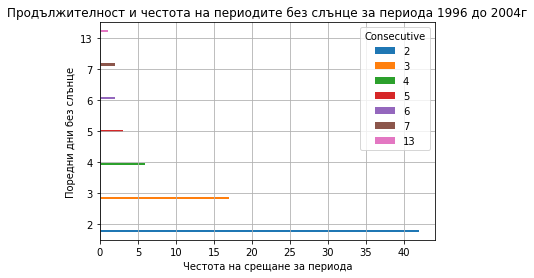

In [90]:
df_consectutive_days.groupby('Consecutive').Consecutive.value_counts().unstack(0).plot.barh()
plt.ylabel('Поредни дни без слънце')
plt.xlabel('Честота на срещане за периода')
plt.title('Продължителност и честота на периодите без слънце за периода 1996 до 2004г')
plt.grid(True)
plt.show()


Друг показател характеризиращ разпределието на слънчевата радиация е разпределението на броя дни без слънце по месеци, което е показано на долната графика.

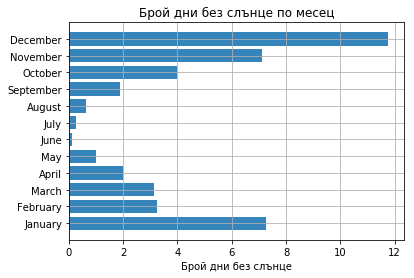

In [116]:
sort = df_clouded.groupby(df_clouded['Date'].dt.month)['total energy from battery [mW]'].count()
sort = sort/8
mean_energy = sort.mean()
months = ('January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December')


plot_barh(months, sort,'Брой дни без слънце', 'Брой дни без слънце по месец')



На база на последните две графики се установява, че в зимните месеци генерираната енергия е по-малка нейното разпределение не е равномерно, тъй като броя на дните без слънце превишава 20% от дните на месеца.

### 5.4.Изводи:

От направеното изследване се установи:

    1.Ясно изразена сезонност на генерираната от слънцето енергия като най-критичен е периодът ноември-януари, където слънчевата енергия е около два пъти по-ниска от средно месечната(на годишна база) и броя на дните без слънце е около два пъти по-голям.
    2.Установи се, че е голяма вероятността за наличие на 5 и повече дневен период без слънце през зимните месеци.
    3.От практическа гледна точка за осигуряването на надеждно електрозахранване през зимния период на обекти чрез фотоволтаични системи е необходимо осигуряване на резервно захранване за поне една седмица.

### 5.5.Литература:

    1.Сл.Р.Аначков, "Метод за проектиране на слънчеви фотоволтаични електрозахранващи системи", "Морски научен форум", том 1, Корабна енергетика, стр.267-274, Офс. изд. ВВМУ "Н.Й.Вапцаров", Варна 1998г. ISSN 1310-9278
    2.Стефка Лингова, "Слънчева радиация", 1995, Пъблиш-Сай-Сет-Агри ООД, ISSN-954-14-0011-6